# Sidereal variation in the atmospheric neutrino flux using the vector model

## How the different oscillation probabilities would differ from the standard oscillations at IceCube

coszen =  -0.002305322686709241


/media/janni/DellPortableHardDrive/Ubuntu/Documents/IceCube-NBI/deimos/deimos/wrapper/osc_calculator.py:593: UserWarning: The coszen argument was ignored. Zenith angle was calculated from RA and declination.
  warnings.warn("The coszen argument was ignored. Zenith angle was calculated from RA and declination.")


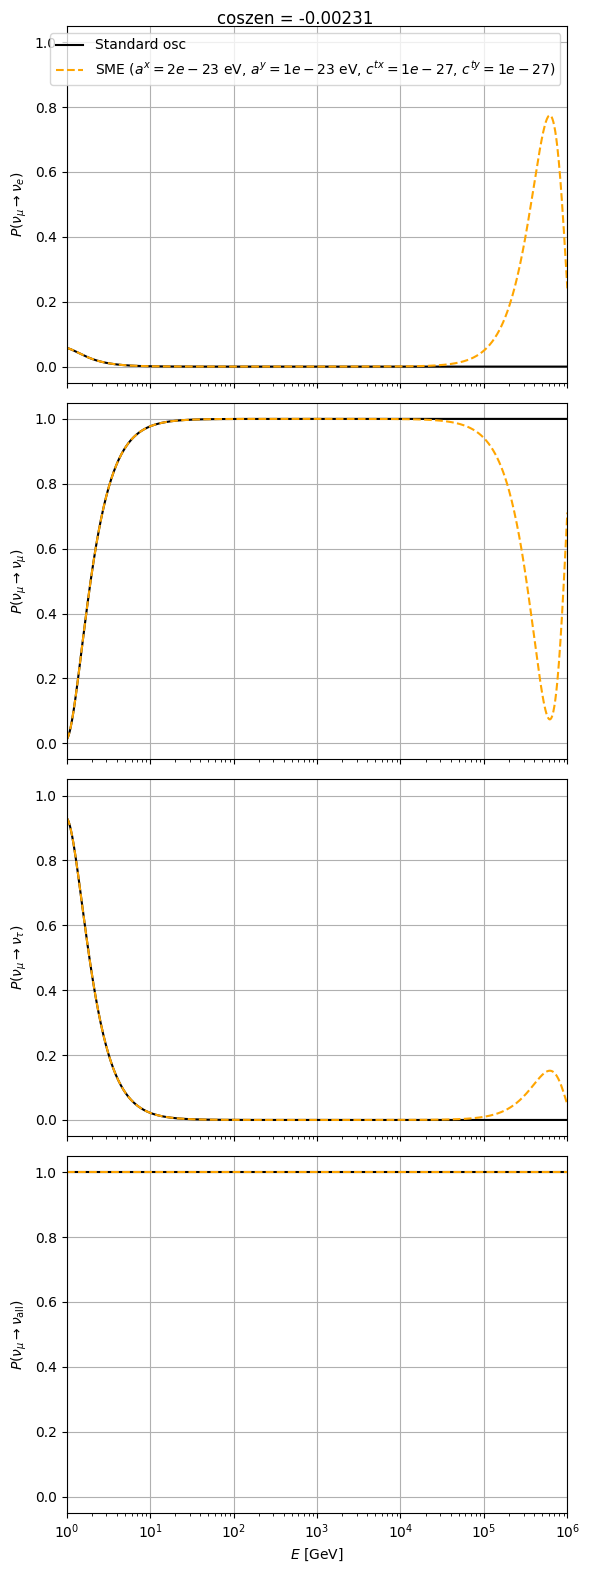

In [1]:
'''
Set detector location and location of the neutrino source on the sky
'''

import sys, os, collections
import numpy as np
from deimos.wrapper.osc_calculator import *
from deimos.utils.plotting import *
from deimos.utils.coordinates import *


#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 1400

#Neutrino source
ra = 10
dec = 0
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, azimuth = coordinates.get_coszen_and_azimuth(
    ra = ra,
    dec = dec,
    date_str = date_str,
    utc_offset_hr = utc_offset_hr
)

#print('coszen = ', coszen)


'''
Plot neutrino oscillations vs. energy for vector model @IceCube
'''


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(1., 1e6, num=1000)
    coszen = coszen
        
    a_eV=np.array([2e-23,1e-23])
    c=np.array([1e-27,1e-27])


    #
    # Plot oscillation vs energy
    #

    # Calc osc probs and plot, without new physics
    calculator.set_std_osc()
    fig, ax, _, = calculator.plot_osc_prob_vs_energy(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="black", label="Standard osc", title=r"coszen = %0.3g"%coszen)

    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra = ra,
                                  dec = dec,
                                  date_str = date_str)
    
    calculator.plot_osc_prob_vs_energy(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label=r"SME ($a^x = %0.3g$ eV, $a^y = %0.3g$ eV, $c^{tx} = %0.3g$, $c^{ty} = %0.3g$)"%(a_eV[0], a_eV[1], c[0], c[1]), linestyle="--", fig=fig, ax=ax)
    #label=f"SME (a (in eV) = {tuple(f"{val:.3g}" for val in a)}, c = {tuple(f"{val:.3g}" for val in c)})"                                                                                                                                            

    #
    # Done
    #


## How a neutrino oscillation signal would look for IceCube compared to KM3NeT

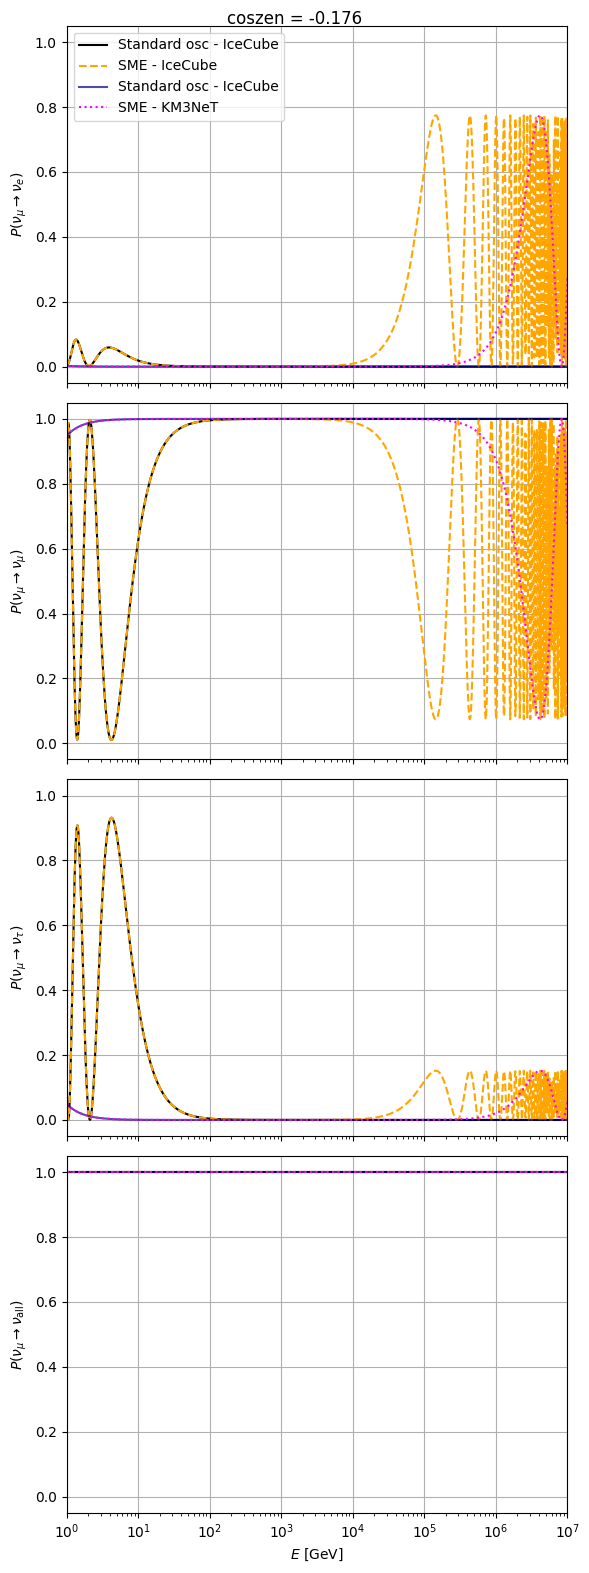

In [2]:
'''
Plot neutrino oscillations vs. energy for vector model for IceCube vs. KM3NeT
'''


#Parameters

#Detector location (IceCube)
detector_lat = "89°59′24″S"
detector_long = "63°27′11″W"
detector_height = 1400

#Neutrino source
ra = 10
dec = 10
date_str = "July 17, 2022, 23:20"
utc_offset_hr = 0


#Calculate coszen
coordinates = CoordTransform(
    detector_lat = detector_lat, 
    detector_long = detector_long, 
    detector_height_m = detector_height
)

coszen, azimuth = coordinates.get_coszen_and_azimuth(
    ra = ra,
    dec = dec,
    date_str = date_str,
    utc_offset_hr = utc_offset_hr
)


#
# Main
#

if __name__ == "__main__" :
    
    
    #
    # Create model
    #

    # Create calculator
    calculator = OscCalculator(
        tool="deimos",
        atmospheric=True,
        num_neutrinos=3,
    )

    # Use vacuum
    calculator.set_matter("vacuum")
    

    #
    # Define neutrino
    #

    initial_flavor, nubar = 1, False # muon neutrino
    E_GeV = np.geomspace(1., 1e7, num=1000)
    coszen = coszen
        
    a_eV=np.array([2e-23,1e-23])
    c=np.array([1e-27,1e-27])


    #
    # Plot oscillation vs energy
    #
    
    # Calc osc probs and plot, without new physics
    calculator.set_std_osc()
    fig, ax, _, = calculator.plot_osc_prob_vs_energy(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="black", linestyle='-', alpha=1, label="Standard osc - IceCube", title=r"coszen = %0.3g"%coszen)

    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
    
    
    # Set detector location for IceCube
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
                                     
    # Set neutrino source
    calculator.set_neutrino_source(ra = ra,
                                  dec = dec,
                                  date_str = date_str)
    
    calculator.plot_osc_prob_vs_energy(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="orange", label="SME - IceCube", linestyle="--", alpha=1, fig=fig, ax=ax)
    
    
    #Redo calculation for KM3NeT
    
    #Set new detector location (KM3NeT [Toulon, FR])
    detector_lat = "43°07′33″N"
    detector_long = "05°55′50″E"
    detector_height = -1000
    
    calculator.set_detector_location(
        lat = detector_lat, 
        long = detector_long, 
        height_m = detector_height
    )
 
    #Calculate coszen
    coordinates = CoordTransform(
        detector_lat = detector_lat, 
        detector_long = detector_long, 
        detector_height_m = detector_height
    )

    coszen, azimuth = coordinates.get_coszen_and_azimuth(
        ra = ra,
        dec = dec,
        date_str = date_str,
        utc_offset_hr = utc_offset_hr
    )

    
    calculator.set_std_osc()
    calculator.plot_osc_prob_vs_energy(initial_flavor=initial_flavor, energy_GeV=E_GeV, fig=fig, ax=ax, coszen=coszen, xscale="log", color="darkblue", linestyle='-', alpha=.7, label="Standard osc - IceCube")

    # Calc osc probs and plot, with SME
    calculator.set_sme(a_eV=a_eV, c=c)
        
    # Set neutrino source
    calculator.set_neutrino_source(ra = ra,
                                  dec = dec,
                                  date_str = date_str)
    
    calculator.plot_osc_prob_vs_energy(initial_flavor=initial_flavor, energy_GeV=E_GeV, coszen=coszen, xscale="log", color="magenta", linestyle=":", alpha=1, label="SME - KM3NeT", fig=fig, ax=ax)
    
    